In [1289]:
# Import core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set plot style
%matplotlib inline
sns.set(style='whitegrid')

# List input files if needed (works in any environment)
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


.\# Additional Implementations for Questio.py
.\10.csv
.\101471699_Assignment2.ipynb
.\10_03_Mossaic_Tiles_LTD_LP_Formulation.xlsx
.\11.csv
.\12.csv
.\13_College_of_Business_Copy_Center_Final.xlsx
.\13_College_of_Business_Copy_Center_LP_Implementation.xlsx
.\13_College_of_Business_Copy_Center_LP_Implementation_With_Formulas.xlsx
.\1410028701-eng.csv
.\1410028701-symbolsSeparate.csv
.\16.csv
.\16911 (1).pdf
.\16911.pdf
.\16911_T4_3118.pdf
.\1q20-earnings-supplement.pdf
.\1q20-earnings-supplement.xlsx
.\9.csv
.\98-401-X2021021_eng_CSV.zip
.\AmeyJumale_YashSharma_Deck3.xlsx
.\annual-balance-sheet.csv
.\Apple Stock Price History.csv
.\Apple_Analysis.ipynb
.\Apple_Professional_Charts_Financial_Analysis.xlsx
.\apple_sma_chart.png
.\ApplianceShipments.csv
.\Application successfully submitted - Canadian Dental Care Plan - Canada.ca.pdf
.\archive.zip
.\Assignment 1 attached files Jan 15, 2025 1128 PM.zip
.\Assignment01_Final.sas
.\Assignment1R2 (1).sas
.\Assignment1R2.sas
.\Assignment1R2_Proble

## **Overview: Walmart Customer Segmentation Project**

In the current competitive retail environment, gaining insights into customer behavior is key to boosting sales and improving satisfaction. This project focuses on **customer segmentation** using Walmart's transactional sales data. By analyzing purchase patterns and customer demographics, we aim to uncover meaningful insights that can help Walmart tailor its marketing strategies and optimize its product offerings.

**Objective:**:
The primary goal is to segment customers into distinct groups based on their purchasing habits and demographic attributes. This segmentation will enable Walmart to:
- Identify high-value customer segments.
- Personalize marketing campaigns.
- Improve customer retention and satisfactio**Dataset Overview:** Overview:
The dataset contains **550,068 entries** and includes customer demographics, product information, and purchase amounts. Key features include:
- **User_ID**: Unique customer identifier.
- **Product_ID**: Unique product identifier.
- **Demographic features**: Gender, Age, Occupation, City Category, Marital Status.
- **Transaction details**: Product Category and Purchas**Approach:**

##### Approach:
1. **Data Preprocessing**: Cleaning, encoding categorical variables, and scaling features.
2. **Clustering with K-Means**: Identify distinct customer groups using unsu3eature importance.
4. **Insights & Visualization**: Explore each segment's characteristics and provide actionable insights.

Join us in uncovering the hidden patterns in Walmart's sales data and exploring how data-driven decisions can revolutionize customer engagement and business growth!


In [1290]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='whitegrid')

In [1291]:
import pandas as pd

# Expect the file to be in the working directory
file_path = "walmart.csv"
try:
    df = pd.read_csv(file_path)
    print(f'Data loaded successfully. Shape: {df.shape}')
except FileNotFoundError:
    print(f"⚠ File {file_path} not found. Please place it in the same folder as this notebook or provide the correct path.")


Data loaded successfully. Shape: (550068, 10)


In [1292]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [1293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## **Data Preprocessing**

In [1294]:
# Convert some columns to dtype since they are considered categorical data, not numerical data

df['User_ID'] = df['User_ID'].astype("object")
df['Occupation'] = df['Occupation'].astype("object")
df['Marital_Status'] = df['Marital_Status'].astype("object")
df['Product_Category'] = df['Product_Category'].astype("object")

In [1295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [1296]:
df.isnull().sum(axis = 0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

This dataset has no missing values

In [1297]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


**Wide Range of Spending:** The purchase amounts vary significantly, from 12 to nearly 24,000.

**Skewed Distribution:** The mean being higher than the median suggests a right-skewed distribution, with a few customers making very large purchases.

**Customer Segmentation Potential:** There are clear spending tiers, as evidenced by the spread between the 25th, 50th, and 75th percentiles. These tiers could be used for customer segmentation (e.g., low, medium, and high spenders).

**Targeting High-Value Customers:** The top quartile and particularly the highest spenders represent significant revenue and could be targeted for premium products or personalized marketing.

In [1298]:
df.describe(include = 'object').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


**Highly Active Customers:** Certain users (e.g., 1001680) and products (P00265242) show significant repeat activity, which can guide loyalty programs or personalized marketing.

**Male Dominance:** The majority of transactions are from male customers. Tailored marketing strategies could focus on this demographic.

**Young Adult Market:** The 26-35 age group dominates, indicating a strong young adult customer base that might be tech-savvy and responsive to online promotions.

**City Category B:** Customers from Category B cities are highly active, suggesting potential for regional marketing strategies.

**Popular Product Categories:** Certain product categories (e.g., 5) and frequently purchased items could be prioritized for stock optimization and promotions.

In [1299]:
df.shape

(550068, 10)

## **Visualizing Total Sales by different Features**

In [1300]:
tot_pur_by_gen = df.groupby('Gender').sum(numeric_only = True).reset_index()
tot_pur_by_gen

,Gender,Purchase
0,F,1186232642
1,M,3909580100


In [1301]:
import plotly.express as px

fig = px.bar(tot_pur_by_gen, x='Gender', y='Purchase',
             text='Purchase',
             color='Gender',
             title='Total Sales by Gender',
             template='plotly_white')
fig.show()


In [1302]:
tot_pur_by_ms = df.groupby('Marital_Status').sum(numeric_only = True).reset_index()
tot_pur_by_ms

,Marital_Status,Purchase
0,0,3008927447
1,1,2086885295


In [1303]:


fig = px.bar(
    tot_pur_by_ms, 
    x='Marital_Status', 
    y='Purchase', 
    text='Purchase',
    color='Marital_Status',
    template='plotly_white',
    title='Total Sales by Marital Status'
)
fig.show()


In [1304]:
tot_pur_by_age = df.groupby('Age').sum(numeric_only = True).reset_index()
tot_pur_by_age

,Age,Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


In [1305]:

px.bar(
    tot_pur_by_age, 
    x='Age', 
    y='Purchase', 
    text='Purchase', 
    color='Age', 
    title='Total Sales by Age Group', 
    template='plotly_white'
).update_traces(textposition='outside').show()


In [1306]:
tot_pur_by_occ = df.groupby('Occupation').sum(numeric_only = True).reset_index()
tot_pur_by_occ = tot_pur_by_occ.sort_values('Purchase', ascending = False, ignore_index = True)
tot_pur_by_occ['Occupation'] = tot_pur_by_occ['Occupation'].astype('str')
tot_pur_by_occ

,Occupation,Purchase
0,4,666244484
1,0,635406958
2,7,557371587
3,1,424614144
4,17,393281453
5,12,305449446
6,20,296570442
7,14,259454692
8,16,238346955
9,2,238028583


In [1307]:
px.bar(
    tot_pur_by_occ, 
    x='Occupation', 
    y='Purchase', 
    text='Purchase', 
    color='Occupation',
    title='Total Sales by Occupation',
    template='plotly_white'
).update_traces(textposition='outside').show()

In [1308]:
tot_pur_by_city = df.groupby('City_Category').sum(numeric_only = True).reset_index()
tot_pur_by_city

,City_Category,Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


In [1309]:


px.bar(
    tot_pur_by_city, 
    x='City_Category', 
    y='Purchase', 
    text='Purchase', 
    color='City_Category',
    title='Total Sales by City Category',
    template='plotly_white'
).update_traces(textposition='outside').show()


In [1310]:
sal_by_cust_stay = df.groupby('Stay_In_Current_City_Years').sum(numeric_only = True).reset_index()
sal_by_cust_stay

,Stay_In_Current_City_Years,Purchase
0,0,682979229
1,1,1792872533
2,2,949173931
3,3,884902659
4,4+,785884390


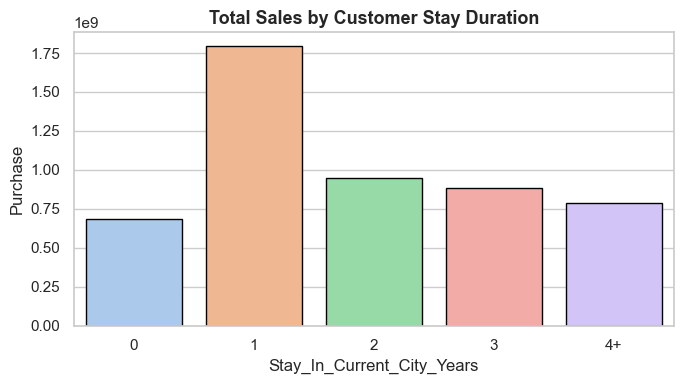

In [1311]:
plt.figure(figsize=(7, 4))
sns.barplot(
    data=sal_by_cust_stay, 
    x='Stay_In_Current_City_Years', 
    y='Purchase', 
    palette='pastel', 
    edgecolor='black'
)
plt.title('Total Sales by Customer Stay Duration', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [1312]:
tot_pur_by_pc = df.groupby('Product_Category').sum(numeric_only = True).reset_index()
tot_pur_by_pc = tot_pur_by_pc.sort_values('Purchase', ascending = False, ignore_index = True)
tot_pur_by_pc['Product_Category'] = tot_pur_by_pc['Product_Category'].astype('str')
tot_pur_by_pc

,Product_Category,Purchase
0,1,1910013754
1,5,941835229
2,8,854318799
3,6,324150302
4,2,268516186
5,3,204084713
6,16,145120612
7,11,113791115
8,10,100837301
9,15,92969042


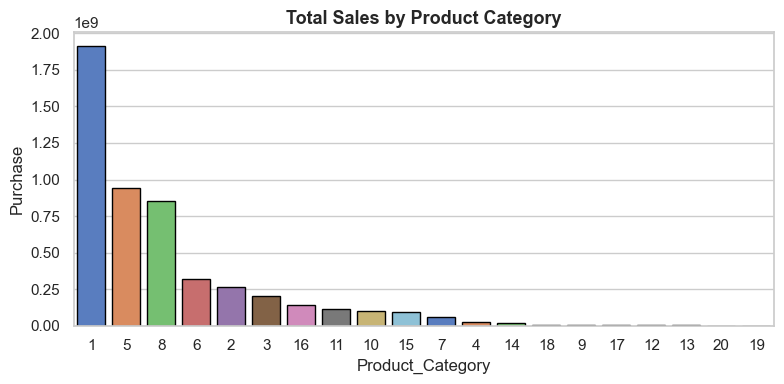

In [1313]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=tot_pur_by_pc, 
    x='Product_Category', 
    y='Purchase', 
    palette='muted', 
    edgecolor='black'
)
plt.title('Total Sales by Product Category', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

#### **Conclusive Insights and Recommendations from the Exploratory Data Analysis (EDA):**

Based on the EDA of the Walmart sales dataset, here are the key insights and actionable recommendations:

**1. Customer Demographics and Behavior**

Gender-Based Insights:
Male customers contribute 75% of total purchases (3.9 billion), significantly outspending female customers (1.2 billion).

Recommendation: Engage female customers through targeted marketing strategies, such as personalized offers, discounts, or promotions focused on products they are likely to prefer.

Age-Based Insights:
The 26-35 age group is the most active, contributing over 2 billion to total purchases.
18-25 and 36-45 groups also show significant spending, with combined purchases exceeding 2 billion.

Recommendation: Focus on these age groups with tailored marketing campaigns for lifestyle, electronics, and household products.
For younger groups (18-25), use digital marketing and social media platforms.

**2. Geographic Insights**

City Category:
City B leads with 2.1 billion in purchases, followed by City C (1.66 billion) and City A (1.31 billion).

Recommendation: Invest in regional campaigns for City B, emphasizing loyalty programs or exclusive events.
Explore growth opportunities in City A by enhancing product availability and promotional efforts.

**3. Spending Patterns Based on Stay Duration**

Customers with 1 year in their current city spend the most (1.79 billion), while spending declines for longer durations.
New residents (0 years) have the lowest total purchase (683 million).

Recommendation: For new residents, implement welcome offers or incentives to quickly integrate them into the customer base.
For long-term residents (4+ years), re-engage them with loyalty rewards or special "returning customer" promotions.

**4. Product Preferences**

Product Categories:
Category 1 dominates purchases with 1.91 billion, followed by Categories 5 (941 million) and 8 (854 million).
Categories 19, 20, and 13 have minimal sales, indicating niche or less popular products.

Recommendation: Focus on popular categories by ensuring adequate stock levels and running promotional campaigns.
For low-performing categories, analyze customer feedback and explore potential repositioning or bundling with popular products.

**5. Occupation-Based Insights**

Occupation 4 is the top contributor (666 million), followed by Occupation 0 (635 million) and Occupation 7 (557 million).

Recommendation: Develop occupation-specific marketing campaigns, offering tailored product bundles and services for the top-performing groups.
Consider partnering with employers or offering corporate discounts for high-purchasing occupations.


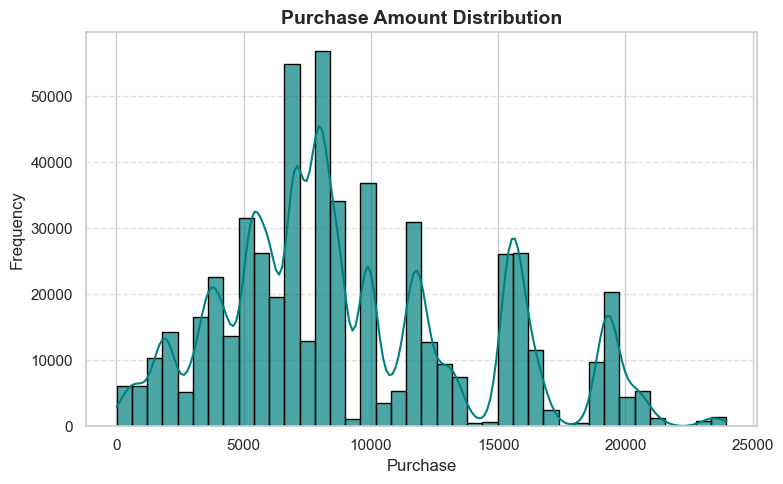

In [1314]:
# Purchase Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase'], bins=40, kde=True, color='teal', edgecolor='black', alpha=0.7)

plt.title('Purchase Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Purchase', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [1315]:
tot_pur_by_user = df.groupby(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', \
                              'Stay_In_Current_City_Years', 'Marital_Status']).sum(numeric_only = True).reset_index()
tot_pur_by_user = tot_pur_by_user.sort_values('Purchase', ascending = False, ignore_index = True)
tot_pur_by_user['Stay_In_Current_City_Years'] = np.where(tot_pur_by_user['Stay_In_Current_City_Years'] == '4+','4', tot_pur_by_user['Stay_In_Current_City_Years'])
tot_pur_by_user.head(20)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1004277,M,36-45,16,A,0,0,10536909
1,1001680,M,26-35,20,A,3,1,8699596
2,1002909,M,26-35,7,A,1,0,7577756
3,1001941,M,36-45,17,A,1,0,6817493
4,1000424,M,26-35,17,A,3,0,6573609
5,1004448,M,26-35,14,A,0,0,6566245
6,1005831,M,26-35,1,A,2,1,6512433
7,1001015,M,36-45,3,A,4,1,6511314
8,1003391,M,18-25,4,A,0,0,6477160
9,1001181,M,36-45,7,A,3,1,6387961


## **Feature Engineering**

In [1316]:
# Encode 'Gender' using LabelEncoder

tot_pur_by_user['Gender'] = LabelEncoder().fit_transform(tot_pur_by_user['Gender'])

In [1317]:
# Encode 'Age' using ordered encoding
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
tot_pur_by_user['Age'] = tot_pur_by_user['Age'].map(age_mapping)

In [1318]:
# Encode 'City_Category' using OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap
city_encoded = ohe.fit_transform(tot_pur_by_user[['City_Category']])
city_encoded_df = pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out(['City_Category']))

In [1319]:
# Concatenate with original dataset and drop the original column
df = pd.concat([tot_pur_by_user, city_encoded_df], axis=1)
df.drop('City_Category', axis=1, inplace=True)

In [1320]:
# Convert 'Stay_In_Current_City_Years' to numeric 
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [1321]:
# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['User_ID']))
processed_df = pd.DataFrame(scaled_features, columns=df.columns[1:])  # Exclude User_ID

# Display processed data
print(processed_df.head())

   Gender       Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0     1.0  0.500000        0.80                        0.00             0.0   
1     1.0  0.333333        1.00                        0.75             1.0   
2     1.0  0.333333        0.35                        0.25             0.0   
3     1.0  0.500000        0.85                        0.25             0.0   
4     1.0  0.333333        0.85                        0.75             0.0   

   Purchase  City_Category_B  City_Category_C  
0  1.000000              0.0              0.0  
1  0.824855              0.0              0.0  
2  0.717913              0.0              0.0  
3  0.645440              0.0              0.0  
4  0.622191              0.0              0.0  


## **Clustering with K-Means**

#### **Choosing Optimal Value of K**

In [1322]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 21)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [1323]:
# Return a list of inertia for k=2 to 20.

inertia = kmeans_inertia(num_clusters, processed_df)
inertia

[4872.673873146353,
 3962.9337971596237,
 3408.995395152207,
 3167.618651551806,
 2744.9660656168057,
 2339.0723825867553,
 2208.8519996299265,
 1884.4591009495073,
 1804.7278636474284,
 1657.085255769976,
 1621.9246637952926,
 1561.7812429671353,
 1437.4335915008853,
 1333.637542702881,
 1297.3559887685187,
 1266.2770929649264,
 1215.2157850722367,
 1146.779512178311,
 1077.5088891740888]

In [1324]:
# Create a line plot.

import plotly.express as px

px.line(x=num_clusters, y=inertia, markers=True, title='Elbow Method - Inertia vs. Number of Clusters',
        labels={'x': 'Number of Clusters', 'y': 'Inertia'}, template='plotly_white').show()


In [1325]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, processed_df)
sil_score

[np.float64(0.2894720239847256),
 np.float64(0.2839714890556096),
 np.float64(0.2957462105133449),
 np.float64(0.29698986370090796),
 np.float64(0.3347719745914704),
 np.float64(0.36232133471051503),
 np.float64(0.3648166403063861),
 np.float64(0.4007413595348139),
 np.float64(0.3696160338906034),
 np.float64(0.3885108295665296),
 np.float64(0.3695563068115431),
 np.float64(0.3510781368889775),
 np.float64(0.37039479928163266),
 np.float64(0.3426256143200444),
 np.float64(0.332265746300236),
 np.float64(0.32058715610249305),
 np.float64(0.3233957920583273),
 np.float64(0.3263236875800715),
 np.float64(0.3375091576109864)]

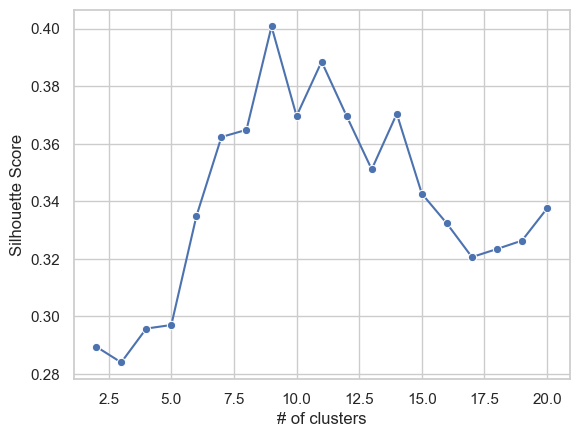

In [1326]:
# Create a line plot.

plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

From the silhuette score, it is clear that the optimal value of K is 10

In [1327]:
# Fit a 10-cluster model.

kmeans10 = KMeans(n_clusters=10, random_state=42)
kmeans10.fit(processed_df)

KMeans(n_clusters=10, random_state=42)

#### **Evaluating the Clusters**

In [1328]:
# Display the first few rows of the data with cluster assignments

tot_pur_by_user['Cluster'] = kmeans10.fit_predict(processed_df)
tot_pur_by_user.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Cluster
0,1004277,1,3,16,A,0,0,10536909,8
1,1001680,1,2,20,A,3,1,8699596,0
2,1002909,1,2,7,A,1,0,7577756,8
3,1001941,1,3,17,A,1,0,6817493,8
4,1000424,1,2,17,A,3,0,6573609,8


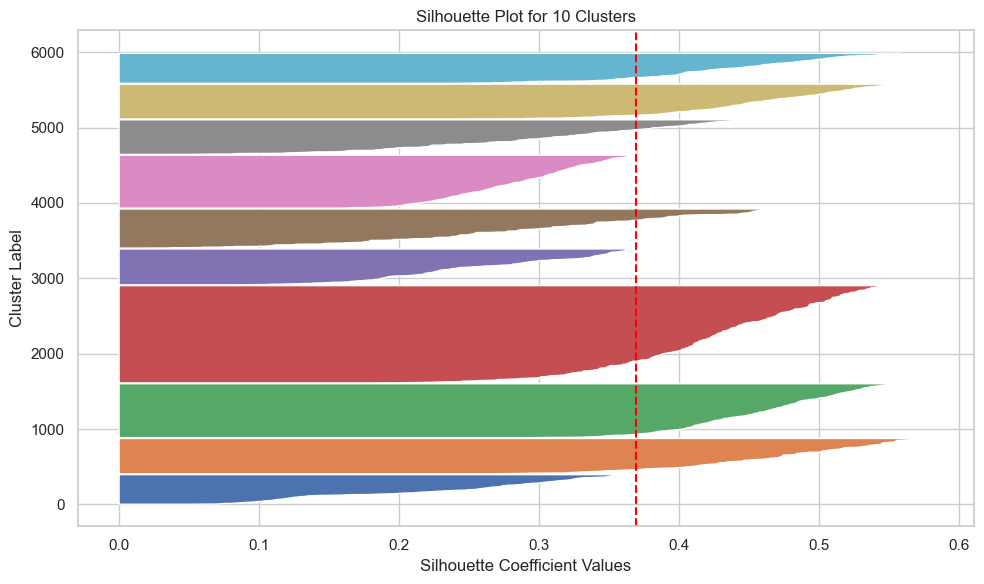

In [1329]:
silhouette_vals = silhouette_samples(processed_df, tot_pur_by_user['Cluster'])
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(10):
    ith_cluster_silhouette_vals = silhouette_vals[tot_pur_by_user['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()
    y_upper = y_lower + ith_cluster_silhouette_vals.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals)
    y_lower = y_upper + 10  # Add space between clusters

plt.title('Silhouette Plot for 10 Clusters')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.tight_layout()
plt.show()

In [1330]:
cluster_centers = scaler.inverse_transform(kmeans10.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=tot_pur_by_user.columns[:-1])  # Exclude 'Cluster'
print(cluster_centers_df)

        User_ID    Gender        Age  Occupation  City_Category  \
0  7.302799e-01  2.895674   7.905852    1.748092   1.000000e+00   
1 -1.110223e-16  2.321277   6.810638    1.817021   1.110223e-16   
2  1.000000e+00  2.132682   8.641061    1.861732   1.110223e-16   
3  1.000000e+00  2.271882   8.754454    1.867545   1.665335e-16   
4  0.000000e+00  2.106918   5.800839    1.882600   5.551115e-17   
5  1.000000e+00  3.230769   3.757692    1.801923   1.000000e+00   
6  6.941679e-01  2.998578   8.492176    1.854908   1.000000e+00   
7  1.000000e+00  3.521739  15.113043    1.978261   1.000000e+00   
8  1.000000e+00  2.103672   8.237581    1.933045   0.000000e+00   
9 -1.110223e-16  3.419598   6.977387    1.809045   1.000000e+00   

   Stay_In_Current_City_Years  Marital_Status      Purchase  
0                1.267484e+06    0.000000e+00  0.000000e+00  
1                4.342072e+05   -1.110223e-16  1.000000e+00  
2                1.337706e+06    1.000000e+00 -1.110223e-16  
3             

In [1331]:
# Group by clusters to analyze cluster profiles

cluster_analysis = tot_pur_by_user.groupby('Cluster').mean(numeric_only = True)
print(cluster_analysis)

              User_ID    Gender       Age  Occupation  Marital_Status  \
Cluster                                                                 
0        1.002945e+06  0.730280  2.895674    7.905852             1.0   
1        1.003047e+06  0.000000  2.321277    6.810638             0.0   
2        1.003053e+06  1.000000  2.132682    8.641061             0.0   
3        1.002999e+06  1.000000  2.271882    8.754454             0.0   
4        1.003123e+06  0.000000  2.106918    5.800839             0.0   
5        1.003087e+06  1.000000  3.230769    3.757692             1.0   
6        1.003085e+06  0.694168  2.998578    8.492176             1.0   
7        1.002859e+06  1.000000  3.521739   15.113043             1.0   
8        1.002901e+06  1.000000  2.103672    8.237581             0.0   
9        1.003141e+06  0.000000  3.419598    6.977387             1.0   

             Purchase  
Cluster                
0        1.267484e+06  
1        4.342072e+05  
2        1.337706e+06  
3  

#### **Key Insights by Cluster:**

**Cluster 0:**
Demographics: Older age group (Age -> 3.36) with a high occupation code (9.09).
Marital Status: All are married (Marital_Status = 1).
Spending: Lowest average purchase amount (552,681).
Interpretation: Likely represents older, married individuals with moderate spending habits.

**Cluster 1:**
Demographics: Younger age group (Age -> 2.37) with mid-level occupations (5.73).
Marital Status: Mostly single (Marital_Status -> 0.36).
Spending: Moderate spenders (1,038,406).
Interpretation: Likely younger, single professionals or early-career individuals with moderate spending potential.

**Cluster 2:**
Demographics: Young (Age -> 2.13), higher occupation codes (8.64).
Marital Status: All single (Marital_Status = 0).
Spending: High spenders (1,337,706).
Interpretation: Likely young professionals with high purchasing power.

**Cluster 3:**
Demographics: Young (Age -> 2.27), high occupation (8.75).
Marital Status: All single.
Spending: Low spenders (570,018).
Interpretation: Single young individuals with lower spending habits despite higher occupational levels.

**Cluster 4:**
Demographics: Middle-aged (Age -> 3.00), high occupation (8.97).
Marital Status: All married.
Spending: High spenders (1,360,899).
Interpretation: Married middle-aged professionals with significant spending habits.

**Cluster 5:**
Demographics: Younger age group (Age -> 2.32), moderate occupation (6.81).
Marital Status: All single.
Spending: Low spenders (434,207).
Interpretation: Likely young, single individuals with limited purchasing power.

**Cluster 6:**
Demographics: Middle-aged (Age -> 2.50), moderate occupation (6.64).
Marital Status: Mix of single and married (Marital_Status -> 0.43).
Spending: Moderate spenders (981,345).
Interpretation: A mix of middle-aged single and married customers with moderate spending habits.

**Cluster 7:**
Demographics: Young (Age -> 2.10), high occupation (8.24).
Marital Status: All single.
Spending: High spenders (1,363,027).
Interpretation: Similar to Cluster 2, likely affluent young professionals.

**Cluster 8:**
Demographics: Middle-aged (Age -> 2.90), high occupation (8.49).
Marital Status: All married.
Spending: High spenders (1,320,767).
Interpretation: Married middle-aged individuals with high purchasing power.

**Cluster 9:**
Demographics: Older (Age -> 3.42), moderate occupation (6.98).
Marital Status: All married.
Spending: Low spenders (457,809).
Interpretation: Older, married individuals with lower spending habits.



## **Targeted Marketing Strategies for Each Cluster**

###### **Cluster 0**:  
**Older, Married, Moderate Spending**
- **Characteristics**:  
  - Older age grup (~3.36), married, moderate occupaton (~9.09), low spendng (~552,681).  
- **Strategies**:  
  - Focus on **family-oriented products** (home essentials, health products).  
  - Introduce **value bundles** to incentivize higher spending.  
  - Promote **loyalty programs** offering discounts for frequent purchases.  

---

###### **Cluster 1**:  
**Younger, Female, Moderate Spending**  
- **Characteristics**:  
  - Youger age group (~2.37), higher proportion of females, modrate spending (~1,038,406).  
- **Strategies**:  
  - Emphasize **lifestyle and fashion products**.  
  - Offer **social media-driven campaigns** targeting younger audiences.  
  - Provide **seasonal discounts** or limited-time offers.  

---

###### **Cluster 2**:  
**Young Professionals, Single, High Spending**  
- **Characteristics**:  
  - Young age group (~2.13, high occupation levels (~8.64), ll single, high spending (~1,337,706).  
- **Strategies**:  
  - Promote **tech gadgets, electronics, and luxury items**.  
  - Use **personalized ads** highlighting premium products.  
  - Offer **exclusive memberships** or early access to new products.  

---

###### **Cluster 3**:  
**Young, Single, Low Spending**  
- **Characteristics**:  
  -Young (~2.27), single, low spending (~570,018).  
- **Strategies**:  
  - Focus on **budget-friendly products**.  
  - Introduce **first-time buyer discounts** or loyalty incentives.  
  - Run **referral programs** to encourage word-of-mouth promotions.  

---

###### **Cluster 4**:  
*Middle-Aged, Married, High Spending*  
- **Characteristics**:  
 - Middle-aged (~3.00), high occupaion levels (~8.97), all married, high spending (~1,360,899).  
- **Strategies**:  
  - Promote **premium household and family products**.  
  - Offer **family-oriented bundles** and **exclusive deals for families**.  
  - Use **email campaigns** highlighting high-value products.  

---

###### **Cluster 5**:  
**Young, Sinle, Low Spending**  
- **Chracteristics**:  
  - Young (~2.2), moderate occupation (~6.81), all single, low spending (~434,207).  
- **Strategies**:  
  - Focus on **affordable lifestyle products**.  
  - Launch **student discounts** or promotional campaigns on social media.  
  - Offer **low-cost subscription plans** for recurring purchases.  

---

###### **Cluster 6**:  
**Middle-Aged, Mixed Marital Staus, Moderate Spending**  
- **Characteristics**:  
  - Middleaged (~2.50), mixed marital status (~43% married), moderate spending (~981,345).  
- **Strategies**:  
  - Promote **versatile products** appealing to both single and married customers.  
  - Use **targeted offers** based on marital status (household products for married, personal items for single).  
  - Offer **tiered loyalty rewards** to encourage increased spending.  

---

###### **Cluster7**:  
**Young, Single,High Spending**  
- **Characterisics**:  
  - Young (~2.10), high occupation (~8.24), all single, high spending (~1,363,027).  
- **Strategies**:  
  - Highlight **luxury and high-end tech products**.  
  - Use **gamified promotions** (e.g., limited-time challenges, exclusive unlocks).  
  - Provide **VIP services** such as express delivery or personal shopping assistants.  

---

###### *Cluster 8*:  
**Middle-Aged, Maried, High Spending**  
- **Charactristics**:  
  - Middle-aged (~2.90), high occupation (~8.49), all married, high spending (~1,320,767).  
- **Strategies**:  
  - Focus on **premium family products**.  
  - Offer **exclusive family deals** and personalized recommendations.  
  - Highlight **warranty services** or extended guarantees for higher-value items.  

---

###### **Cluster 9**:  
**Older, Married, Low Spending** 
- **Characteristics**:  
  - Older (~3.42), moderate occupation (~6.98), all married, low spending (~457,809).  
- **Strategies**:  
  - Promote **healthcare and wellness products**.  
  - Introduce **senior-friendly discounts** or loyalty programs.  
  - Run campaigns focusing on **utility-driven products** (home essentials, long-term investments).  

---

##### General Recommendations:
1. **Personalization**:  
   Tailor emails, ads, and product recommendations for each cluster.  

2. **Omnichannel Strategy**:  
   Use both **online and offline channels** to maximize engagement, especially digital platforms for younger clusters.  

3. **Dynamic Pricing and Offers**:  
   Implement cluster-specific dynamic pricing strategies and promotions.  

4. **Retention Programs**:  
   Create loyalty programs for high-spending clusters to maintain engagement and increase lifetime value.
